Descripción del código:
Archivo para entender la validación del modelo.

Se seleccionaron 5 abstracts al azar, sobre los que se procesaron con la función principal: se extrajeron los sustantivos. 
Este resultado se contrastará con el análisis de los mismos textos por un experto en el tema.

Luego se calculan métricas de estimación de errores: Exactitud, Precisión, Sensibilidad y F1.
Además se grafica la matriz de confusión, comparando la clasificación real con la predicha.

Input: Archivos excel con la caracterización manual y por el modelo
Output: Métricas de análisis, Matriz de confusión

In [37]:
#importar librerias

import json
import spacy
import en_core_web_sm
import re
import pandas as pd
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os

In [4]:
#cargar los archivos

with open ('pubmed_data262.json','r',encoding='utf-8') as f:
    pubmed_data=json.load(f)


#primer output: archivo de texto con los abstracts
#segundo output: ese archivo para procesarlo posteriormente. Luego obtener una lista por cada pmid con los sustantivos correspondientes

1. Seleccionar 5 publicaciones de forma aleatoria

In [5]:
#lista de los pmids
lista_pmids=[]
for paper in pubmed_data:
    lista_pmids.append(paper['PMID'])

#5 valores aleatorios

muestras = random.sample(lista_pmids,5)
print(muestras)


['38721332', '38279025', '33679850', '39437840', '37073477']


In [6]:
#Filtrar el json de pubmed desde los pmids. lista de abstracts

abstracts=[]
for paper in pubmed_data:
    if paper['PMID'] in muestras:
        abstracts.append(paper['Abstract'])


print(len(abstracts))

5


In [7]:
for e in abstracts:
    print(e)

Non-native trees disrupt ecological processes vital to native plant communities. We studied how forests dominated by <i>Acacia dealbata</i> and <i>Eucalyptus globulus</i> affect the role of birds as dual pollinators and seed dispersers in a region heavily impacted by these two non-native species. We compared bird-plant interactions in the native and in the two non-native forest types. We constructed a multilayer regional network for each forest type and evaluated differences in network dissimilarity between networks. We also calculated the bird's importance in connecting processes and variables associated with module diversity. To determine how the networks react to changes in species richness, we did a simulation of species richness gradient and link percentage for each forest type. The number of birds acting both as pollinators and seed dispersers was higher in native than in non-native forests. However, birds in non-native forests still play a crucial role in maintaining the ecologi

Primer output: 

Archivo de texto para analizar manualmente. Se espera un análisis sintáctico para identificar los sustantivos según el contexto. 
El nombre de cada archivo es PMID correspondiente.

In [8]:
#Esto de aquí no sé si sea realmente necesario. Tal vez para nombrar los archivos
#Filtrar el json de pubmed desde los pmids. Abstract + PMID
json_fil = [{paper['PMID']: paper['Abstract']} for paper in pubmed_data if paper['PMID'] in muestras]
for e in json_fil:
    print(e)

{'39437840': "Non-native trees disrupt ecological processes vital to native plant communities. We studied how forests dominated by <i>Acacia dealbata</i> and <i>Eucalyptus globulus</i> affect the role of birds as dual pollinators and seed dispersers in a region heavily impacted by these two non-native species. We compared bird-plant interactions in the native and in the two non-native forest types. We constructed a multilayer regional network for each forest type and evaluated differences in network dissimilarity between networks. We also calculated the bird's importance in connecting processes and variables associated with module diversity. To determine how the networks react to changes in species richness, we did a simulation of species richness gradient and link percentage for each forest type. The number of birds acting both as pollinators and seed dispersers was higher in native than in non-native forests. However, birds in non-native forests still play a crucial role in maintaini

In [ ]:
#Output para analizar de forma manual (Archivo de Texto)

for diccionario in json_fil:     
    for nombre_archivo, contenido in diccionario.items():
        with open(f"{nombre_archivo}.txt","w",encoding="utf-8") as archivo:
            archivo.write(contenido)
            

Segundo output: 

Resultado de análisis por el modelo "en_core_web_sm". 

El dataframe exportado en formato excel incluye las columnas de: posición, palabra y Part of Speech (Sustantivo u Otro).
En este mismo archivo se completó la clasificación manual

In [ ]:
#Output con palabras clasificadas por el modelo. Luego completar aquí mismo la clasificación real

nlp = spacy.load("en_core_web_sm")     

def clean_text(texto):                                                         
    return re.sub(r"<.*?>", "", str(texto)) 

for diccionario in json_fil:
    for nombre_archivo,contenido in diccionario.items():
        doc = nlp(clean_text(contenido))
        data=[]
        
        for i,token in enumerate(doc):
            clasificacion = "SUSTANTIVO" if token.pos_ in ["NOUN","PROPN"] else "OTRO"
            data.append({'posición':i+1,'palabra':token.text,'POS':clasificacion})

    df_val_pred=pd.DataFrame(data)
    salida = f"{nombre_archivo}.xlsx"
    df_val_pred.to_excel(salida,index=False)


2. Comparación entre el análisis manual con el resultado del modelo. 


Análisis matemático de la validación:
Se calculan los siguientes campos según su clasificación (Sustantivo - Otro)

Positivos (P): Sustantivos reales según el análisis manual
Negativos (N): Otras palabras reales según el análisis manual
Verdaderos Positivos (TP): Positivos correctamente identificados por el modelo
Verdaderos Negativos (TN): Negativos correctamente identificados por el modelo
Falsos Positivos (FP): Otros identificados como sustantivos
Falsos Negativos (FN): Sustantivos identificados como otros

Se calcularán Exactitud, Precisión, Sensibilidad y F-1
Se graficará una matriz de confusión.

In [ ]:
#Código para trabajar con varios archivos

archivos = ['33679850.xlsx','37073477.xlsx','38279025.xlsx','38721332.xlsx','39437840.xlsx'] 

lista=[]

for PMID in archivos:
    df = pd.read_excel(e)
    df.insert(0,'PMID', os.path.splitext(e)[0])
    lista.append(df)

df_val = pd.concat(lista, ignore_index=True) # reeplazar por df_val



In [47]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PMID          1160 non-null   object
 1   posición      1160 non-null   int64 
 2   palabra       1160 non-null   object
 3   POS_Predicho  1160 non-null   object
 4   POS_REAL      1160 non-null   object
dtypes: int64(1), object(4)
memory usage: 45.4+ KB


In [50]:
df_val['TP'] = ((df_val['POS_REAL'] == 'SUSTANTIVO') & (df_val['POS_Predicho'] == 'SUSTANTIVO')).astype(int)
df_val['TN'] = ((df_val['POS_REAL'] == 'OTRO') & (df_val['POS_Predicho'] == 'OTRO')).astype(int)
df_val['FP'] = ((df_val['POS_REAL'] == 'OTRO') & (df_val['POS_Predicho'] == 'SUSTANTIVO')).astype(int)
df_val['FN'] = ((df_val['POS_REAL'] == 'SUSTANTIVO') & (df_val['POS_Predicho'] == 'OTRO')).astype(int)
df_val['y_true'] = df_val['POS_REAL'].apply(lambda x: 1 if x== 'SUSTANTIVO' else 0)
df_val['y_pred'] = df_val['POS_Predicho'].apply(lambda x: 1 if x== 'SUSTANTIVO' else 0)



In [54]:
print(df_val.tail())

          PMID  posición  palabra POS_Predicho    POS_REAL  TP  TN  FP  FN  \
1155  39437840       228  effects   SUSTANTIVO  SUSTANTIVO   1   0   0   0   
1156  39437840       229   across         OTRO        OTRO   0   1   0   0   
1157  39437840       230  trophic         OTRO  SUSTANTIVO   0   0   0   1   
1158  39437840       231   levels   SUSTANTIVO  SUSTANTIVO   1   0   0   0   
1159  39437840       232        .         OTRO        OTRO   0   1   0   0   

      y_true  y_pred  
1155       1       1  
1156       0       0  
1157       1       0  
1158       1       1  
1159       0       0  


In [58]:
#calcular
TP = df_val['TP'].sum()
TN = df_val['TN'].sum()
FP= df_val['FP'].sum()
FN=df_val['FN'].sum()
P=(df_val['y_true']==1).sum()
N=(df_val['y_true']==0).sum()

print('P:',P," ",'N:',N," ",'TP:',TP," ",'TN:',TN," ",'FP:',FP," ",'FN:',FN)

P: 390   N: 770   TP: 345   TN: 760   FP: 10   FN: 45


In [61]:
#Cálculo de métricas

precision = TP/(TP + FP) if (TP + FP)>0 else 0
recall = TP/P if P >0 else 0 #Tasa de verdaderos positivos
accuracy = (TP +TP)/(P + N ) if (P + N)>0 else 0  #Exactitud
f1 = 2*(precision * recall)/(precision + recall) if (precision + recall)>0 else 0

print('precision:',precision)
print('recall:',recall)
print('accuracy:',accuracy)
print('f1:',f1)

precision: 0.971830985915493
recall: 0.8846153846153846
accuracy: 0.5948275862068966
f1: 0.9261744966442953


In [62]:
#otras métricas

error = (FP + FN)/(P + N)
tasa_fp = FP/(FP + TN)

print('Error:',error)
print('Tasa de Falsos Positivos:',tasa_fp)

Error: 0.04741379310344827
Tasa de Falsos Positivos: 0.012987012987012988


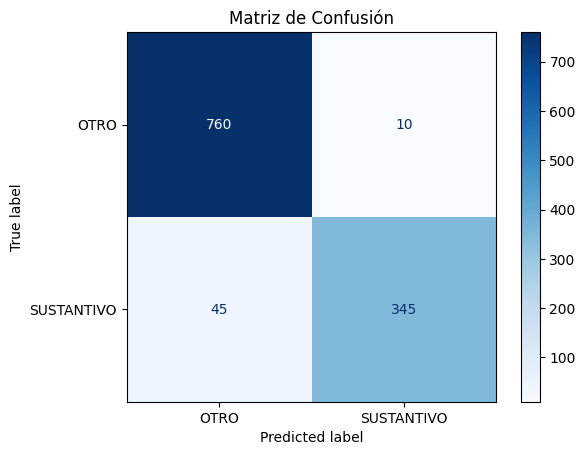

In [51]:

cm = confusion_matrix(df_val['y_true'],df_val['y_pred'])

disp = ConfusionMatrixDisplay (confusion_matrix=cm,display_labels=['OTRO','SUSTANTIVO'])
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()

In [68]:
no_rec = df[(df_val['y_pred'] != df_val['y_true']) & df_val['POS_REAL']=='SUSTANTIVO']
print(no_rec)

Empty DataFrame
Columns: [PMID, posición, palabra, POS_Predicho, POS_REAL]
Index: []


/var/folders/z6/m38l9jcx5tn1q649hp37hy0r0000gn/T/ipykernel_1412/209748435.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_rec = df[(df_val['y_pred'] != df_val['y_true']) & df_val['POS_REAL']=='SUSTANTIVO']


In [67]:
fal_neg=df[(df_val['POS_REAL']=='SUSTANTIVO')& (df_val['POS_Predicho']=='OTRO')]
print(fal_neg)

         PMID  posición     palabra POS_Predicho    POS_REAL
5    39437840         6  ecological         OTRO  SUSTANTIVO
91   39437840        92          's         OTRO  SUSTANTIVO
121  39437840       122    richness         OTRO  SUSTANTIVO
122  39437840       123    gradient         OTRO  SUSTANTIVO
124  39437840       125        link         OTRO  SUSTANTIVO
169  39437840       170  ecological         OTRO  SUSTANTIVO
202  39437840       203  structural         OTRO  SUSTANTIVO
208  39437840       209          's         OTRO  SUSTANTIVO
229  39437840       230     trophic         OTRO  SUSTANTIVO


/var/folders/z6/m38l9jcx5tn1q649hp37hy0r0000gn/T/ipykernel_1412/3786631048.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fal_neg=df[(df_val['POS_REAL']=='SUSTANTIVO')& (df_val['POS_Predicho']=='OTRO')]
